In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler,LabelEncoder, MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping

In [133]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML programming/data/WISDM.csv')

In [134]:
df

,0,33,Jogging,4.9106E+13,-0.6946377,12.680544,0.50395286
0,1,33,Jogging,4.910610e+13,5.012288,11.264028,0.953424
1,2,33,Jogging,4.910610e+13,4.903325,10.882658,-0.081722
2,3,33,Jogging,4.910620e+13,-0.612916,18.496431,3.023717
3,4,33,Jogging,4.910630e+13,-1.184970,12.108489,7.205164
4,5,33,Jogging,4.910640e+13,1.375655,-2.492524,-6.510526
...,...,...,...,...,...,...,...
1048569,1048571,7,Standing,2.091650e+14,-7.930000,5.430000,-0.990000
1048570,1048572,7,Standing,2.091660e+14,-7.970000,5.130000,-1.140000
1048571,1048573,7,Standing,2.091660e+14,-7.970000,5.220000,-1.380000
1048572,1048574,7,Standing,2.091660e+14,-7.930000,5.600000,-1.180000


In [135]:
LABELS = ["index", "user", "activity", "timestamp", "x-accel", "y-accel", "z-accel"]
df.columns = LABELS
df = df[df["activity"].isin(["Jogging", "Sitting"])]
df = df.drop(["index", "user", "timestamp"], axis=1)
df.head()

,activity,x-accel,y-accel,z-accel
0,Jogging,5.012288,11.264028,0.953424
1,Jogging,4.903325,10.882658,-0.081722
2,Jogging,-0.612916,18.496431,3.023717
3,Jogging,-1.184970,12.108489,7.205164
4,Jogging,1.375655,-2.492524,-6.510526


In [136]:
df.activity.value_counts()

,count
activity,
Jogging,325974
Sitting,54876


In [137]:
encoder = LabelEncoder()
df['activity'] = encoder.fit_transform(df['activity'])
df["activity"].value_counts()

,count
activity,
0,325974
1,54876


In [138]:
RANDOM_SEED = 42

In [139]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train[X_train.activity == 1]
X_train = X_train.drop(['activity'], axis=1)

y_test = X_test['activity']
X_test = X_test.drop(['activity'], axis=1)

X_train = X_train.values
X_test = X_test.values

X_train.shape

(43861, 3)

In [140]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [141]:
# 오토인코더 모델

input_dim = X_train.shape[1]
encoding_dim = 7  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [149]:
# 3. 모델 학습
# 훈련데이터의 0.1 을 validation data로 사용
history = autoencoder.fit(X_train_scaled, X_train_scaled,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_split = 0.1,
                       )

Epoch 1/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0042 - val_loss: 0.0043
Epoch 2/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0041 - val_loss: 0.0042
Epoch 3/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0040 - val_loss: 0.0042
Epoch 4/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0040 - val_loss: 0.0041
Epoch 5/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0040 - val_loss: 0.0041
Epoch 6/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 7/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 8/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0040 - val_loss: 0.0041
Epoch 9/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 10/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0040 - val_loss: 0.0041
Epoch 11/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0040 - val_loss: 0.0041
Epoch 12/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

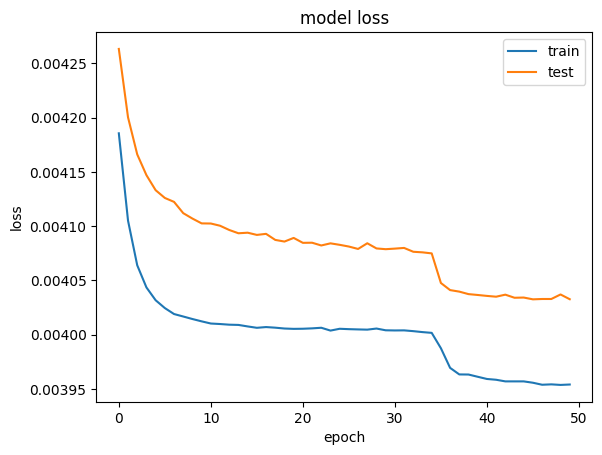

In [150]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

In [151]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨

predictions = autoencoder.predict(X_test_scaled)
predictions = scaler.inverse_transform(predictions)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

2381/2381 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


,reconstruction_error,true_class
count,76170.000000,76170.000000
mean,32.223300,0.144611
std,42.546578,0.351710
min,0.000639,0.000000
25%,3.458608,0.000000
50%,14.457307,0.000000
75%,47.023552,0.000000
max,421.560199,1.000000


In [152]:
error_df.head()

,reconstruction_error,true_class
469045,0.597710,1
169577,2.821993,0
639903,5.181891,1
962556,91.657413,0
546410,52.207662,0


In [153]:
# threshold 값을 조정하여 최선의 정확도를 얻음, 그래프로를 보고 결정

threshold = 0.1

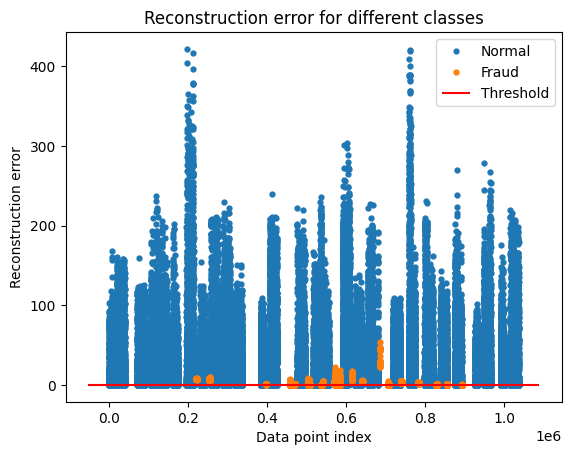

In [154]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show()

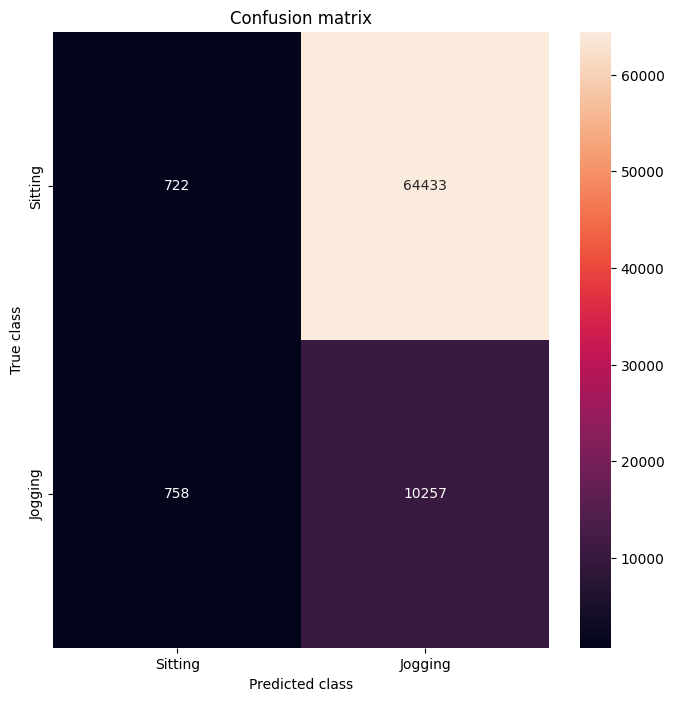

              precision    recall  f1-score   support

           0       0.49      0.01      0.02     65155
           1       0.14      0.93      0.24     11015

    accuracy                           0.14     76170
   macro avg       0.31      0.47      0.13     76170
weighted avg       0.44      0.14      0.05     76170



In [156]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
LABELS = ["Sitting", "Jogging"]
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))